# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [88]:
X = df['bedrooms'].values[:, np.newaxis]
y = df['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [89]:
model = LinearRegression()
model.fit(X_train, Y_train)

print("Slope Coefficient: ", model.coef_[0])
print("\nIntercept Value: ", model.intercept_)

Slope Coefficient:  121771.49525816698

Intercept Value:  127548.13222145278


In [90]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)
#RootMSE
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))
# A helpful interpretation for the R2 is the percentage of the dependent variable that is explained by the model.
# In other words, the R2 is the percentage of y that is explained by the x variables included in the model. 
# For this reason the R2 is also known as the "coefficient of determination," because it explains how much of y 
# is explained (or determined) by our x varaibles. We won't go into the calculation of R2 today, just know that a
# higher R2 percentage is nearly always better and indicates a model that fits the data more closely. 

MSE is 135282270279.38022
RMSE is 367807.3820349181
R^2 is 0.09177413835874848


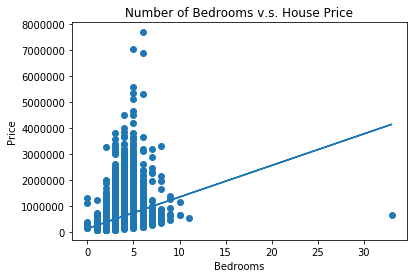

In [91]:
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df.bedrooms, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Bedrooms")
plt.title("Number of Bedrooms v.s. House Price")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [92]:
X = df[['bedrooms','sqft_living']].values
y = df['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10806, 2)
(10807, 2)
(10806,)
(10807,)


In [93]:
model = LinearRegression()
model.fit(X_train, Y_train)

print("Slope Coefficient: ", model.coef_)
print("\nIntercept Value: ", model.intercept_)

Slope Coefficient:  [-61633.19206584    304.72984939]

Intercept Value:  111190.51860875927


In [94]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)
#RootMSE
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 73857406595.95146
RMSE is 271767.19190504117
R^2 is 0.504153747526068


111190.51860875927
304.7298493882088


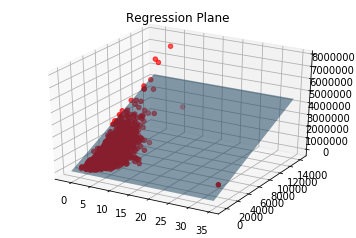

In [95]:
from mpl_toolkits.mplot3d import Axes3D

beta_0 = model.intercept_
beta_i = model.coef_[1]

print(beta_0)
print(beta_i)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['bedrooms'], df['sqft_living'], y, c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i*xx + beta_i*yy + beta_0

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [96]:
df.head()
df = df.drop('date', axis=1)

In [105]:
y = df['price'].values
X = df.drop('price', axis=1).values


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10806, 19)
(10807, 19)
(10806,)
(10807,)


In [106]:
model = LinearRegression()
model.fit(X_train, Y_train)

print("Slope Coefficient: ", model.coef_)
print("\nIntercept Value: ", model.intercept_)

Slope Coefficient:  [-2.00506453e-06 -3.41181059e+04  3.97473262e+04  9.89756792e+01
  9.32592572e-02  1.00895137e+04  5.72441870e+05  5.38583443e+04
  2.45630510e+04  9.96587887e+04  5.99886240e+01  3.89870556e+01
 -2.48106275e+03  2.10197652e+01 -5.41292831e+02  5.90386757e+05
 -1.82472792e+05  2.65417221e+01 -3.89604248e-01]

Intercept Value:  6923623.5525703225


In [107]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)
#RootMSE
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 46543830648.168526
RMSE is 215740.19247272523
R^2 is 0.6875251235271402


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
